# detect_onset.py

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab)  
> Federal University of ABC, Brazil

One of the simplest methods to automatically detect or identify the change or occurrence of a particular event in the data, for example, its beginning and ending, or simply the data onset, is based on amplitude threshold, where the signal is considered to be 'on' when it is above a certain threshold. This threshold can be proportional to the amplitude of the baseline (the part of the data that we know there is no real signal, only noise).  

For instance, a threshold equals to two or three times the standard deviation of the baseline is a common procedure employed in the analysis of electromyographic data. Other way to set the threshold would be as a percentage value of the maximum or peak of the data. For instance, in movement analysis it's common to define the onset period as the signal above 5% of the peak velocity of the investigated movement. 

The function `detect_onset.py` (code at the end) implements such onset detection based on the amplitude-threshold method with a parameter to specify a minimum number of samples above threshold to detect as onset, other parameter to specify the minimum number of samples (continuous or not) below threshold that will be ignored in the detection of data greater or equal to threshold (to avoid the detection of spikes or transients in the data), and a second threshold parameter to specify the minimum amplitude that a minimum number of samples should have (to avoid the detection of baseline fluctuations that are above the first threshold but are not actual signals).  

`detect_onset.py` signature is:
```python
inds = detect_onset(x, threshold=0, n_above=1, n_below=0,
                    threshold2=None, n_above2=1, show=False, ax=None)
```
Let's see how `detect_onset.py` works; first let's import the necessary Python libraries and configure the environment:  

In [1]:
from detecta import detect_onset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's run the function examples:

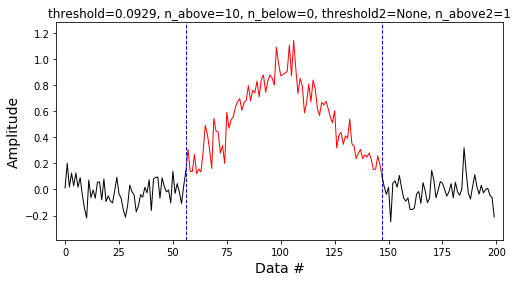

array([[ 56, 147]])

In [3]:
    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=0, show=True)

Add some noise:

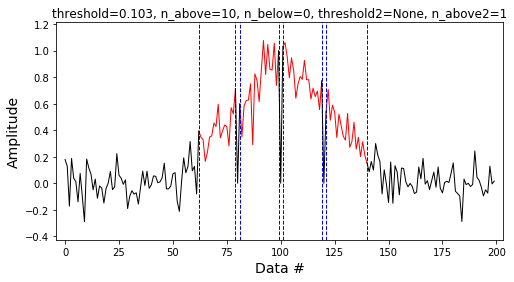

array([[ 62,  79],
       [ 81,  99],
       [101, 119],
       [121, 140]])

In [4]:
    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=0, show=True)

We will use the `n_below` parameter to not detect the noise from former example as onsets:

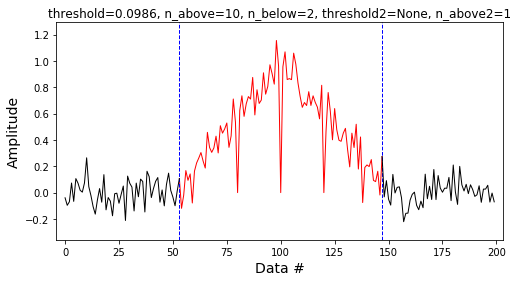

array([[ 53, 147]])

In [5]:
    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=2, show=True)

`detect_onset` works with missing values (NaNs):

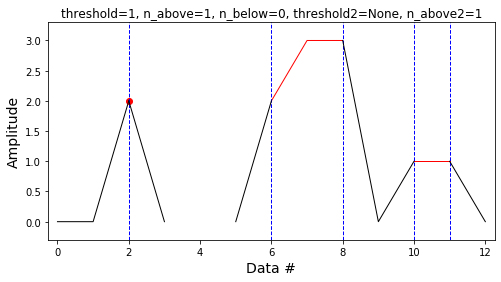

array([[ 2,  2],
       [ 6,  8],
       [10, 11]])

In [6]:
    >>> x = [0, 0, 2, 0, np.nan, 0, 2, 3, 3, 0, 1, 1, 0]
    >>> detect_onset(x, threshold=1, n_above=1, n_below=0, show=True)

Consider the case where there is a false onset because some data in the baseline are greater than the `threshold`:

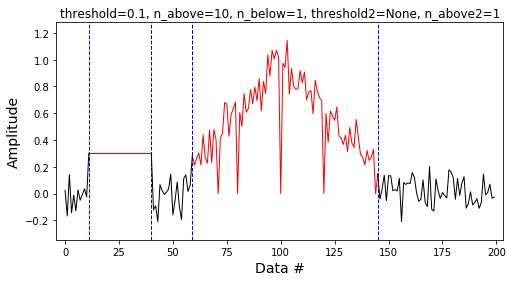

array([[ 11,  40],
       [ 59, 145]])

In [7]:
    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .1, n_above=10, n_below=1, show=True)

We can't increase the value of the `threshold` because this would delay the detection of the actual onset:

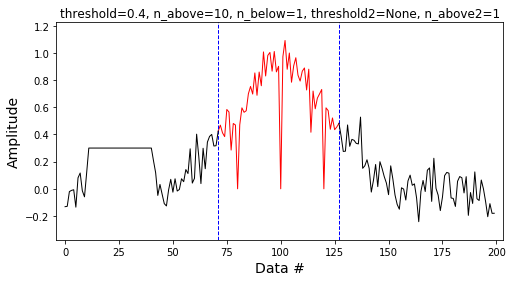

array([[ 71, 127]])

In [8]:
    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .4, n_above=10, n_below=1, show=True)  

For this situation we can use the second threshold parameter, `threshold2` with corresponding `n_above2` parameter:

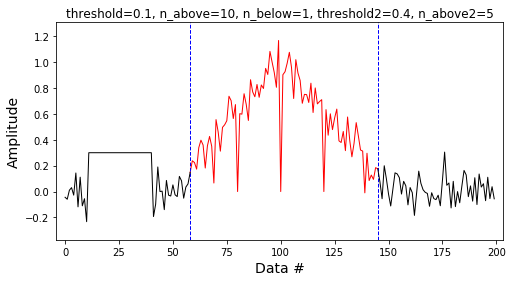

array([[ 58, 145]])

In [9]:
    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .1, n_above=10, n_below=1,
                     threshold2=.4, n_above2=5, show=True)

#### Performance

The performance of the `detect_onset` function varies with the data and parameters.  
Here is a simple test of the `detect_onset.py` performance:

In [10]:
x = np.random.randn(10000)
print('Detection of onset (data size= %d):' %x.size)
%timeit detect_onset(x, threshold=0, n_above=10, n_below=1, threshold2=.5, n_above2=5, show=False)

Detection of onset (data size= 10000):
485 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
